In [1]:
# --------------------------------------------------
# TREC IS 2021a Evaluation Script
# Configured for 2020-B Events
# Used to evaluate TREC-IS runs
# --------------------------------------------------
version = 3.0 # Notebook Version Number
edition = "2021a"

import os
cwd = os.getcwd()


In [2]:
# Configuration Information

# Do we try and normalize the run priority scores?
enablePriorityNorm = True

# Score threshold
enableCategoryNorm = True
defaultScoreThreshold = 0.5

taskCategories = [
    "CallToAction-Donations",
    "CallToAction-MovePeople",
    "CallToAction-Volunteer",
    "Other-Advice",
    "Other-ContextualInformation",
    "Other-Discussion",
    "Other-Irrelevant",
    "Other-Sentiment",
    "Report-CleanUp",
    "Report-EmergingThreats",
    "Report-Factoid",
    "Report-FirstPartyObservation",
    "Report-Hashtags",
    "Report-Location",
    "Report-MultimediaShare",
    "Report-News",
    "Report-NewSubEvent",
    "Report-Official",
    "Report-OriginalEvent",
    "Report-ServiceAvailable",
    "Report-ThirdPartyObservation",
    "Report-Weather",
    "Request-GoodsServices",
    "Request-InformationWanted",
    "Request-SearchAndRescue",
]

# What we consider to be highly important categories of information
highImportCategories = [
    "Request-GoodsServices",
    "Request-SearchAndRescue",
    "CallToAction-MovePeople",
    "Report-EmergingThreats",
    "Report-NewSubEvent",
    "Report-ServiceAvailable"
]

highImportCategoriesShort = [
    "GoodsServices",
    "SearchAndRescue",
    "MovePeople",
    "EmergingThreats",
    "NewSubEvent",
    "ServiceAvailable"
]

# Priority map
priorityScoreMap = {
    "Critical": 1.0,
    "High": 0.75,
    "Medium": 0.5,
    "Low": 0.25,
}

# Parameters
var_lambda = 0.75 # weight to place on actionable information categories in comparison to non actionable categoriee
var_alpha = 0.3 # Flat gain for providing a correct alert, regardless of the categories selected


In [3]:
# Events with no data, so we should skip them
skipEvents = [
"2015_09_28_hurricane_joaquin.2015",
"2017_03_23_cyclone_debbie.2017",
"2018_02_24_anticyclone_hartmut.2018",
"2018_07_13_ferguson_wildfire.2018",
"2018_07_23_cranston_wildfire.2018",
"2018_07_23_klamathon_wildfire.2018",
"2018_08_05_holy_wildfire.2018",
"2018_09_07_hurricane_florence.2018",
"2018_10_07_hurricane_michael.2018",
"2018_11_07_Woolsey_wildfire.2018",
"2018_pittsburgh_synagogue_shooting",
"2019_03_01_alberta_wildfire.2019.v2",
"2019_08_25_hurricane_dorian.2019",
"2019_09_17_tropicalstorm_imelda.2019",
"2019_10_10_saddleridge_wildfire.2019",
"2019_karnataka_floods",
"2019_spring_floods_in_ontario_quebec_and_new_brunswick",
"2019_townsville_flood",
"2020_01_28_bar_shooting_nc.2020",
"2020_02_07_rutherford_tn_floods.2020",
"2020_02_10_mideast_tornadoes.day1_mississipi.2020",
"2020_02_10_mideast_tornadoes.day3_md.2019",
"2020_05_26_edenville_dam_failure.2020.corrected",
"2020_08_27_hurricane_laura.2020",
"2020_09_11_hurricane_sally.2020",
"2020_afghanistan_flood",
"2020_hpakant_jade_mine_disaster",
"2020_kerala_floods",
"2020_tornado_outbreak_of_march",
"brooklynblockparty_shooting.2019",
"indonesia_earthquake.2019",
"T2020_02_03_texas_university_shooting.2020",
"tornado_outbreak_of_november_30_december_2018",
"UNASSIGNED",
    
# Skip below to allow evaluation only on the pt2 data
"2020_01_27_houston_explosion.2020", # 2021a.pt1
"2016_puttingal_temple", # 2021a.pt1
"2017_12_04_thomas_wildfire.2017", # 2021a.pt1
"2017_12_07_lilac_wildfire.2017", # 2021a.pt1
"2018_maryland_flood", # 2021a.pt1
"2019_saugus_high_school_shooting", # 2021a.pt1
"2020_easter_tornado_outbreak", # 2021a.pt1
    
# "2019_10_25_kincade_wildfire.2019",  # 2021a.pt2
# "2019_durham_gas_explosion",  # 2021a.pt2
# "2020_02_10_mideast_tornadoes.day2_al.2020",  # 2021a.pt2
# "2020_05_06_tn_derecho.2020",  # 2021a.pt2
# "2020_tornado_outbreak_of_april",  # 2021a.pt2
# "2020_visakhapatnam_gas_leak",  # 2021a.pt2

]


In [4]:
import glob

runFile = None
for f in glob.glob("*.gz"):
    runFile = f

print("Run File:", f)

Run File: run.json.gz


In [5]:
import gzip
import json

In [6]:
runName = None

with gzip.open(runFile, "r") as inRunFile:
    for line in inRunFile:
        line = line.decode("utf8")
#         runName = line.rpartition("\t")[2].strip()
        runName = json.loads(line)["runtag"]
        break

print("Run Name:", runName)

Run Name: njit_semi_sup


In [7]:
# Do we try and normalize the run priority scores?
enablePriorityNorm = False

dataDir = "../../data/2021a"

# The location of the topics file
topicsFile = "%s/2021a.topics" % dataDir

# The location of the ground truth data against which to compare the run
classificationLabelFiles = [
#     "%s/TRECIS-2021A-crisis.labels.prelim.json" % dataDir,
    "%s/TRECIS-2021A-crisis.labels.prelim.pt2.json" % dataDir,
]

# The location of the ontology file
ontologyFile = "%s/TRECIS-2021A-ITypes.json" % dataDir


In [8]:
topicArray = []

with open(topicsFile, "r") as inTopicsFile:
    
    topicNum = None
    topicDataset = None
    
    for line_ in inTopicsFile:
        line = line_.strip()
        
        if line == "</top>":
            if topicDataset in skipEvents:
                continue
            topicArray.append((topicDataset, topicNum))
            
        if line.startswith("<num>"):
            topicNum = line.partition("<num>")[2].partition("</num>")[0]
            
        if line.startswith("<dataset>"):
            topicDataset = line.partition("<dataset>")[2].partition("</dataset>")[0]
            
for row in topicArray:
    print(row)

('2020_02_10_mideast_tornadoes.day2_al.2020', 'TRECIS-CTIT-H-081')
('2020_05_06_tn_derecho.2020', 'TRECIS-CTIT-H-083')
('2019_10_25_kincade_wildfire.2019', 'TRECIS-CTIT-H-107')
('2019_durham_gas_explosion', 'TRECIS-CTIT-H-108')
('2020_tornado_outbreak_of_april', 'TRECIS-CTIT-H-119')
('2020_visakhapatnam_gas_leak', 'TRECIS-CTIT-H-121')


In [9]:
# --------------------------------------------------
# Static data for the 2021 edition
# --------------------------------------------------
# Identifiers for the test events
eventidTopicidMap = dict(topicArray)
eventIdentifiers = list(eventidTopicidMap.keys())

resultsFile = open(runName+".results.v"+str(version)+"."+edition+".overall.txt","w+")
resultsFile.write("TREC-IS "+edition+" Notebook Evaluator v"+str(version)+"\n")
resultsFile.write("Run: "+runName+" ("+runFile+")"+"\n")
resultsFile.write(""+"\n")

perTopicFile = open(runName+".results.v"+str(version)+"."+edition+".pertopic.txt","w+")
perTopicFile.write("TREC-IS "+edition+" Notebook Evaluator v"+str(version)+"\n")
perTopicFile.write("Run: "+runName+" ("+runFile+")"+"\n")
perTopicFile.write(""+"\n")

perEventFile = open(runName+".results.v"+str(version)+"."+edition+".perevent.txt","w+")
perEventFile.write("TREC-IS "+edition+" Notebook Evaluator v"+str(version)+"\n")
perEventFile.write("Run: "+runName+" ("+runFile+")"+"\n")
perEventFile.write(""+"\n")

1

In [10]:
# --------------------------------------------------
# Processing Starts Here
# --------------------------------------------------
import json
import gzip
import math
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt

# --------------------------------------------------
# Stage 1: Load the ground truth dataset 
# --------------------------------------------------

groundtruthJSON = []
for groundtruthFile in classificationLabelFiles:
    print("Reading "+groundtruthFile)
    with open(groundtruthFile, encoding='iso-8859-1') as groundtruthJSONFile:    
        groundtruthJSON.append(json.load(groundtruthJSONFile))
#pprint(groundtruthJSON["events"])

# --------------------------------------------------
# Stage 2: Load run file 
# --------------------------------------------------
with gzip.open(runFile, "r") as openRunFile:
#     runContents = [line.decode("utf8") for line in openRunFile.readlines()] # lines not yet decoded
    runContents = [json.loads(line.decode("utf8")) for line in openRunFile.readlines()] # lines not yet decoded
#pprint(runContents[0])

Reading ../../data/2021a/TRECIS-2021A-crisis.labels.prelim.pt2.json


In [11]:
# --------------------------------------------------
# Stage 3: Load the categories 
# --------------------------------------------------
with open(ontologyFile, encoding='utf-8') as ontologyJSONFile:    
    ontologyJSON = json.load(ontologyJSONFile)

informationTypes2Index = {} # category -> numerical index
informationTypesShort2Index = {} # category short form (e.g. Report-EmergingThreats vs. EmergingThreats) -> numerical index

for informationTypeJSON in ontologyJSON["informationTypes"]:
    informationTypeId = informationTypeJSON["id"]
    
    informationTypeIndex = taskCategories.index(informationTypeId)
    informationTypes2Index[informationTypeId] = informationTypeIndex
    informationTypesShort2Index[informationTypeId.split("-")[1]] = informationTypeIndex

In [12]:
# -----------------------------------------------------------
# Stage 4: Produce ground truth maps between tweetIds and categories
# -----------------------------------------------------------
# Notes: Ground truth is used as a base, if a run includes tweets
#        not in the ground truth they will be ignored
# Assumptions: A tweet will not be returned for multiple events

tweetId2TRECInfoCategories = {} # tweet id -> Array of categories selected by assessors
tweetId2TRECHighImportInfoCategories = {} # tweet id -> Array of categories selected by assessors
tweetId2TRECLowImportInfoCategories = {} # tweet id -> Array of categories selected by assessors
tweetId2TRECPriorityCategory = {} # tweet id -> priority label (Critical,High,Medium,Low)
index2TweetId = {} # ordered tweets
event2tweetIds = {} # event -> tweet ids for tweets within that event
countHighCriticalImport = 0
countLowMediumImport = 0
tweetsSeen = []


invertedPriorityScoreMap = {
    v:k for k,v in priorityScoreMap.items()
}

tweetIndex = 0
for groundtruth in groundtruthJSON:
    for eventJSON in groundtruth["events"]:
        eventid = eventJSON["eventid"]
        print(eventid)
        
        if eventid in skipEvents:
            continue
        
        if not event2tweetIds.get(eventid):
            event2tweetIds[eventid] = []
        
        if any(eventid in s for s in eventIdentifiers):
            # iterate over tweets in the event
            for tweetJSON in eventJSON["tweets"]:
                tweetid = tweetJSON["postID"]
                categories = tweetJSON["postCategories"]
                priority = tweetJSON["postPriority"]
                
                if priority == "High" or priority == "Critical":
                    countHighCriticalImport = countHighCriticalImport + 1
                
                if priority == "Low" or priority == "Medium":
                    countLowMediumImport = countLowMediumImport + 1
                
                # check categories for name issues and correct if possible
                cleanedCategories = []
                highImportCats = []
                lowImportCats = []
                for categoryId in categories:
                    if not any(categoryId in s for s in informationTypesShort2Index.keys()):
#                         print("Found unknown category in ground truth "+categoryId+", ignoring...")
                        pass
                    else:
                        cleanedCategories.append(categoryId)
                        if any(categoryId in s for s in highImportCategoriesShort):
                            highImportCats.append(categoryId)
                        else:
                            lowImportCats.append(categoryId)
    
                if tweetid not in tweetsSeen:
                    event2tweetIds[eventid].append(tweetid)
                    tweetId2TRECInfoCategories[tweetid] = cleanedCategories
                    tweetId2TRECHighImportInfoCategories[tweetid] = highImportCats
                    tweetId2TRECLowImportInfoCategories[tweetid] = lowImportCats
                    tweetId2TRECPriorityCategory[tweetid] = priority
                    index2TweetId[tweetIndex] = tweetid;
                    tweetIndex = tweetIndex + 1
                    tweetsSeen.append(tweetid)

                else:
                    tweetId2TRECInfoCategories[tweetid] = list(set(
                        cleanedCategories + tweetId2TRECInfoCategories[tweetid]
                    ))
                    
                    prePriorityScore = priorityScoreMap[tweetId2TRECPriorityCategory[tweetid]]
                    thisPriorityScore = priorityScoreMap[priority]
                    
                    tweetId2TRECPriorityCategory[tweetid] = invertedPriorityScoreMap[
                        max(prePriorityScore, thisPriorityScore)
                    ]

                
        else:
            print("WARN: Found ground truth data for event not in the topic set "+eventid+", ignoring...")

2020_01_27_houston_explosion.2020
2020_02_10_mideast_tornadoes.day2_al.2020
2020_02_10_mideast_tornadoes.day3_md.2019
2020_05_06_tn_derecho.2020
2020_05_26_edenville_dam_failure.2020.corrected
2016_puttingal_temple
2017_12_04_thomas_wildfire.2017
2017_12_07_lilac_wildfire.2017
2018_10_07_hurricane_michael.2018
2018_11_07_Woolsey_wildfire.2018
2018_maryland_flood
2018_pittsburgh_synagogue_shooting
2019_08_25_hurricane_dorian.2019
2019_10_10_saddleridge_wildfire.2019
2019_10_25_kincade_wildfire.2019
2019_durham_gas_explosion
2019_saugus_high_school_shooting
2020_easter_tornado_outbreak
2020_tornado_outbreak_of_april
2020_tornado_outbreak_of_march
2020_visakhapatnam_gas_leak
tornado_outbreak_of_november_30_december_2018


In [13]:
# -----------------------------------------------------------
# Stage 5: Produce run predicted maps between tweetIds and categories
# -----------------------------------------------------------
tweetId2RunInfoCategories = {} # tweet id -> predicted category by participant system
tweetId2RunHighImportInfoCategories = {} # tweet id -> predicted category by participant system
tweetId2RunLowImportInfoCategories = {} # tweet id -> predicted category by participant system
tweetId2RunInfoCategoriesProb = {} # tweet id -> predicted category probability by participant system
tweetId2RunInfoCategoriesProbNorm = {} # tweet id -> predicted category probability by participant system
tweetId2RunPriorityScore = {} # tweet id -> importance score from participant system
tweetId2RunPriorityCategory = {} # tweet id -> importance category (Critical, High, Medium Low)
tweetId2RunPriorityScoreNorm = {} # tweet id -> importance score from participant system
event2TweetIdRank = {} # event -> (rank,tweetid)

maxPrediction = -999999
minPrediction = 999999
maxCategory = -999999
minCategory = 999999

for predictionParts in runContents:
    
    #print(runLine)
    if (len(predictionParts)<6 ):
        print(runLine)
        continue
    else:
        eventId = predictionParts["topic"]
        
        if eventId in skipEvents:
            continue
        
        tweetId = predictionParts["tweet_id"]
        rank = 0
        #print(predictionParts[5])

        category_scores = predictionParts["info_type_scores"]
        category_labels = predictionParts["info_type_labels"]

        priority = float(predictionParts["priority"])
        
        if priority > maxPrediction:
            maxPrediction = priority
        if priority < minPrediction:
            minPrediction = priority
        
        cleanedCategories = []
        cleanedCategoriesProbs = []
        highImportCats = []
        lowImportCats = []
        
        # Handle category flags
        for catIndex, categoryLabel in enumerate(category_labels):
            # check if we have a binary flag for this label
            if categoryLabel == 0:
                # False flag, so skip
                continue
                
            categoryId = taskCategories[catIndex]
            
            if not any(categoryId in s for s in informationTypes2Index.keys()):
                print("Found unknown category in run "+categoryId+", ignoring...")
            else:
                cleanedCategories.append(categoryId)
                if any(categoryId in s for s in highImportCategories):
                    highImportCats.append(categoryId)
                else:
                    lowImportCats.append(categoryId)
                    
        # Process category probabilities
        for categoryProbability in category_scores:
            
            if categoryProbability > maxCategory:
                maxCategory = categoryProbability
            if categoryProbability < minCategory:
                minCategory = categoryProbability
            
            cleanedCategoriesProbs.append(categoryProbability)
                
        tweetId2RunHighImportInfoCategories[tweetId] = highImportCats
        tweetId2RunLowImportInfoCategories[tweetId] = lowImportCats
        tweetId2RunInfoCategories[tweetId] = cleanedCategories
        tweetId2RunInfoCategoriesProb[tweetId] = cleanedCategoriesProbs
        tweetId2RunPriorityScore[tweetId] = priority
        
        if priority > priorityScoreMap["High"]:
            tweetId2RunPriorityCategory[tweetId] = "Critical"
        elif priority > priorityScoreMap["Medium"]:
            tweetId2RunPriorityCategory[tweetId] = "High"
        elif priority > priorityScoreMap["Low"]:
            tweetId2RunPriorityCategory[tweetId] = "Medium"
        else:
            tweetId2RunPriorityCategory[tweetId] = "Low"
        
        if not event2TweetIdRank.get(eventId):
            event2TweetIdRank[eventId] = []
        rankTuple = (tweetId,rank)
        event2TweetIdRank.get(eventId).append(rankTuple)


for eventId in event2TweetIdRank.keys():
    tweetsSorted = sorted(event2TweetIdRank.get(eventId), key=lambda tup: tup[1])
    event2TweetIdRank[eventId] = tweetsSorted
    
for i in range(len(index2TweetId)):
    tweetId = index2TweetId[i]
    if tweetId2RunPriorityScore.get(tweetId):
        
        if enablePriorityNorm:
            if (minPrediction-minPrediction) == 0.0:
                tweetId2RunPriorityScoreNorm[tweetId] = 0.0
            else:
                tweetId2RunPriorityScoreNorm[tweetId] = (tweetId2RunPriorityScore.get(tweetId)-minPrediction)/(maxPrediction-minPrediction)
        else:
            tweetId2RunPriorityScoreNorm[tweetId] = tweetId2RunPriorityScore.get(tweetId)
    else:
        tweetId2RunPriorityScoreNorm[tweetId] = 0.0


In [14]:
# --------------------------------------------------
# Stage 6: Create ground truth vectors per category
# --------------------------------------------------

category2GroundTruth = {} # category -> tweet vector with binary 1 vs all ground truth category labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    categoryVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        categories = tweetId2TRECInfoCategories.get(tweetId)
        #pprint(categories)
        if any(categoryIdShort in s for s in categories):
            categoryVector.append(1)
        else:
            categoryVector.append(0)
    category2GroundTruth[categoryId] = categoryVector
            
#pprint(category2GroundTruth)

In [15]:
# --------------------------------------------------
# Stage 7: Create run vectors per category 
# --------------------------------------------------
# Assumptions: If run misses a tweet, we assume it has
#              no categories
category2Predicted = {} # category -> tweet vector with binary 1 vs all predicted by system labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    categoryVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        
        if tweetId2RunInfoCategories.get(tweetId):
            categories = tweetId2RunInfoCategories.get(tweetId)
            if any(categoryIdShort in s for s in categories):
                categoryVector.append(1)
            else:
                categoryVector.append(0)
        else:
            categoryVector.append(0)

    category2Predicted[categoryId] = categoryVector

#pprint(category2Predicted)

In [16]:
# --------------------------------------------------
# Stage 8: Make event category vectors 
# --------------------------------------------------

event2groundtruth = {} # event -> category -> tweet vector with binary 1 vs all ground truth category labels
for eventId in eventIdentifiers:
    eventCategories = {}
    for categoryId in informationTypes2Index.keys():
        categoryIdShort = categoryId.split("-")[1]
        categoryVector = []
#         print(eventId)
        for tweetId in event2tweetIds.get(eventId):
#             print(tweetId)
            categories = tweetId2TRECInfoCategories.get(tweetId)
            if any(categoryIdShort in s for s in categories):
                categoryVector.append(1)
            else:
                categoryVector.append(0)
            
        eventCategories[categoryId] = categoryVector
    event2groundtruth[eventId] = eventCategories
    

event2prediction = {} # event -> category -> tweet vector with binary 1 vs all predicted by system labels
for eventId in eventIdentifiers:
    print(eventId)
    eventCategories = {}
    for categoryId in informationTypes2Index.keys():
        categoryIdShort = categoryId.split("-")[1]
        categoryVector = []
#         print(tweetId)
        for tweetId in event2tweetIds.get(eventId):
            #print(tweetId)
            categories = tweetId2RunInfoCategories.get(tweetId)
            
            if categories == None:
                categories = json.loads("[]")
                tweetId2RunInfoCategories[tweetId] = categories
            
            if any(categoryId in s for s in categories):
                categoryVector.append(1)
            else:
                categoryVector.append(0)
            
        eventCategories[categoryId] = categoryVector
    event2prediction[eventId] = eventCategories

2020_02_10_mideast_tornadoes.day2_al.2020
2020_05_06_tn_derecho.2020
2019_10_25_kincade_wildfire.2019
2019_durham_gas_explosion
2020_tornado_outbreak_of_april
2020_visakhapatnam_gas_leak


In [17]:
# -----------------------------------------------------------
# Stage 9: Make priority classification vectors
# -----------------------------------------------------------

category2GroundTruthPriority = {} # category -> tweet vector with binary 1 vs all ground truth priority labels

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    priorityVector = []
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        categories = tweetId2TRECInfoCategories.get(tweetId)
        if any(categoryIdShort in s for s in categories):
            priority = tweetId2TRECPriorityCategory.get(tweetId)
            priorityVector.append(priority)
    category2GroundTruthPriority[categoryId] = priorityVector

category2PredictedPriority = {} # category -> tweet vector with binary 1 vs all predicted by system labels
category2PredictedPriorityScore = {} # Category -> tweet vector with priority scores

for categoryId in informationTypes2Index.keys():
    categoryIdShort = categoryId.split("-")[1]
    categoryVector = []
    categoryScoreVector = []
    
    for i in range(len(index2TweetId)):
        tweetId = index2TweetId[i]
        categories = tweetId2TRECInfoCategories.get(tweetId)
        if any(categoryIdShort in s for s in categories):
            if tweetId2RunPriorityCategory.get(tweetId):
                priority = tweetId2RunPriorityCategory.get(tweetId)
                priorityScore = tweetId2RunPriorityScore.get(tweetId)
            
                categoryVector.append(priority)
                categoryScoreVector.append(priorityScore)
            else:
                categoryVector.append("Low") # default to low priority
                categoryScoreVector.append(0.25)

    category2PredictedPriority[categoryId] = categoryVector
    category2PredictedPriorityScore[categoryId] = categoryScoreVector
        


In [18]:
# --------------------------------------------------
# Disable Warnings (comment this out when debugging!)
# --------------------------------------------------
import warnings
# warnings.filterwarnings("ignore") # ignore warnings about 0-score categories

In [19]:
# --------------------------------------------------
# TREC-IS 2021A
# Priority-Centric Discounted Cumulative Gain
# --------------------------------------------------

import pandas as pd

def calc_dcg(scores, at_k=100):
    position = 1
    accumulator = 0.0
    for score in scores[:at_k]:

        numerator = 2 ** score - 1
        denom = np.log2(position + 1)

        accumulator += numerator / denom
        position += 1

    return accumulator

priority_map = {
    "Low": 1,
    "Medium": 2,
    "High": 3,
    "Critical": 4,
}

at_k = 100

tweetId2TRECPriorityCategory_score = {
    k:priority_map[v] for k,v in tweetId2TRECPriorityCategory.items()
}
tweetId2TRECPriorityCategory_scores_sorted = sorted(
    tweetId2TRECPriorityCategory_score.values(),
    reverse=True
)

best_dcg_per_event = {}
for event, rel_tweets in event2tweetIds.items():
    print(event)
    
    tweetId2TRECPriorityCategory_scores_sorted = sorted(
        [tweetId2TRECPriorityCategory_score[x] for x in rel_tweets],
        reverse=True
    )
    ideal_dcg = calc_dcg(tweetId2TRECPriorityCategory_scores_sorted, at_k)
    print("\tBest DCG:", ideal_dcg)
    best_dcg_per_event[event] = ideal_dcg
    
print("Mean:", np.mean(list(best_dcg_per_event.values())))
print()

# Code below calculates the DCG for a system's 
#  ranked priority tweets. We have to do some 
#  sampling here to break ties among tweets with
#  the same priority scores.

# Build a dataframe from the system's provided
#  priority scores, so we can identify what the
#  top-most priorities are and get a count of
#  the number of tweets in each priority bin.
priority_df = pd.DataFrame(
    [(k, priority_map[v]) for k, v in tweetId2RunPriorityCategory.items()],
    columns=["tweet_id", "priority"]
)

# Build metrics for each event
system_dcg_per_event = {}
for event, rel_tweets in event2tweetIds.items():
    print("Event:", event)
    local_priority_df = priority_df[priority_df["tweet_id"].isin(set(rel_tweets))]
    
    unique_scores = local_priority_df["priority"].value_counts()
    
    # Find the top priority scores that would be included
    #  in the necessary at_k values.
    total = 0
    top_keys = []
    candidates = {}
    for top in sorted(unique_scores.index, reverse=True):

        # We store this key, so we can go back and shuffle
        #. tweets with this score.
        top_keys.append(top)
        local_restricted_df = local_priority_df[local_priority_df["priority"] == top]
        candidates[top] = list(local_restricted_df["tweet_id"])

        total += local_restricted_df.shape[0]

        # Once we have enough samples, stop.
        if ( total > at_k ):
            break

    # Now we generate distribution over the DCG for this
    #  system and do this a number of times to remove
    #  dependence on our selection of the top k tweets
    random_dcgs = []
    for i in range(100):

        local_tweet_ids = []
        for top in top_keys:
            this_top_tweets = candidates[top][:]
            np.random.shuffle(this_top_tweets)

            needed = at_k - len(local_tweet_ids)
            local_tweet_ids.extend(this_top_tweets[:needed])

        local_scores = [tweetId2TRECPriorityCategory_score[x] for x in local_tweet_ids]

        random_dcgs.append(calc_dcg(local_scores))

    system_dcg = np.mean(random_dcgs)

    system_ndcg_ = system_dcg / best_dcg_per_event[event]
    print("\tnDCG:", system_ndcg_)
    system_dcg_per_event[event] = system_ndcg_
    
print()
system_ndcg_micro = np.mean(list(system_dcg_per_event.values()))
print("System Event-Micro nDCG:", system_ndcg_micro)

resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: nDCG and Priority"+"\n")
resultsFile.write("Overall performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> nDCG:"+"\t"+str(system_ndcg_micro)+"\n")
resultsFile.write(""+"\n")

2020_02_10_mideast_tornadoes.day2_al.2020
	Best DCG: 191.461480104077
2020_05_06_tn_derecho.2020
	Best DCG: 146.57069611996656
2019_10_25_kincade_wildfire.2019
	Best DCG: 314.08006311421406
2019_durham_gas_explosion
	Best DCG: 154.57069611996653
2020_tornado_outbreak_of_april
	Best DCG: 314.08006311421406
2020_visakhapatnam_gas_leak
	Best DCG: 314.08006311421406
Mean: 239.1405102811087

Event: 2020_02_10_mideast_tornadoes.day2_al.2020
	nDCG: 0.492897349714141
Event: 2020_05_06_tn_derecho.2020
	nDCG: 0.5366682494756289
Event: 2019_10_25_kincade_wildfire.2019
	nDCG: 0.6292309703698102
Event: 2019_durham_gas_explosion
	nDCG: 0.3841372498567193
Event: 2020_tornado_outbreak_of_april
	nDCG: 0.6752902632184775
Event: 2020_visakhapatnam_gas_leak
	nDCG: 0.632307873206393

System Event-Micro nDCG: 0.558421992640195


1

In [20]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Type Categorization
# Overall performance
# --------------------------------------------------
# Average performance over information types
# Macro averaged (information types have equal weight)
# Does not average across events (larger events have more impact)
# Positive class is the target class
# Precision, recall and F1 only consider the positive class
# Accuracy is an overall metric
# We report performance for all categories, high importance categories and low importance categories

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

avgPrecision = 0.0
avgRecall = 0.0
avgF1 = 0.0
avgAccuracy = 0.0

avgPrecisionHigh = 0.0
avgRecallHigh = 0.0
avgF1High = 0.0
avgAccuracyHigh = 0.0

avgPrecisionLow = 0.0
avgRecallLow = 0.0
avgF1Low = 0.0
avgAccuracyLow = 0.0

for categoryId in informationTypes2Index.keys():
    categoryPrecision = precision_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    categoryRecall = recall_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    categoryF1 = f1_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    categoryAccuracy = accuracy_score(category2GroundTruth[categoryId], category2Predicted[categoryId])
    
    avgPrecision = avgPrecision + categoryPrecision
    avgRecall = avgRecall + categoryRecall
    avgF1 = avgF1 + categoryF1
    avgAccuracy = avgAccuracy + categoryAccuracy
    
    if any(categoryId in s for s in highImportCategories):
        avgPrecisionHigh = avgPrecisionHigh + categoryPrecision
        avgRecallHigh = avgRecallHigh + categoryRecall
        avgF1High = avgF1High + categoryF1
        avgAccuracyHigh = avgAccuracyHigh + categoryAccuracy
    else:
        avgPrecisionLow = avgPrecisionLow + categoryPrecision
        avgRecallLow = avgRecallLow + categoryRecall
        avgF1Low = avgF1Low + categoryF1
        avgAccuracyLow = avgAccuracyLow + categoryAccuracy

numInformationTypes = len(informationTypes2Index)
numHighInformationTypes = len(highImportCategories)
numLowInformationTypes = numInformationTypes - numHighInformationTypes
        
print("Information Type Precision (positive class, multi-type, macro): "+str(avgPrecision/numInformationTypes))
print("Information Type Recall (positive class, multi-type, macro): "+str(avgRecall/numInformationTypes))
print("Information Type F1 (positive class, multi-type, macro): "+str(avgF1/numInformationTypes))
print("Information Type Accuracy (overall, multi-type, macro): "+str(avgAccuracy/numInformationTypes))

print("High Importance Information Type Precision (positive class, multi-type, macro): "+str(avgPrecisionHigh/numHighInformationTypes))
print("High Importance Information Type Recall (positive class, multi-type, macro): "+str(avgRecallHigh/numHighInformationTypes))
print("High Importance Information Type F1 (positive class, multi-type, macro): "+str(avgF1High/numHighInformationTypes))
print("High Importance Information Type Accuracy (overall, multi-type, macro): "+str(avgAccuracyHigh/numHighInformationTypes))

print("Low Importance Information Type Precision (positive class, multi-type, macro): "+str(avgPrecisionLow/numLowInformationTypes))
print("Low Importance Information Type Recall (positive class, multi-type, macro): "+str(avgRecallLow/numLowInformationTypes))
print("Low Importance Information Type F1 (positive class, multi-type, macro): "+str(avgF1Low/numLowInformationTypes))
print("Low Importance Information Type Accuracy (overall, multi-type, macro): "+str(avgAccuracyLow/numLowInformationTypes))

resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: Information Type Categorization"+"\n")
resultsFile.write("Overall performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> Information Type Precision (positive class, multi-type, macro):"+"\t"+str(avgPrecision/len(informationTypes2Index))+"\n")
resultsFile.write("> Information Type Recall (positive class, multi-type, macro):"+"\t"+str(avgRecall/len(informationTypes2Index))+"\n")
resultsFile.write("> Information Type F1 (positive class, multi-type, macro):"+"\t"+str(avgF1/len(informationTypes2Index))+"\n")
resultsFile.write("> Information Type Accuracy (overall, multi-type, macro):"+"\t"+str(avgAccuracy/len(informationTypes2Index))+"\n")
resultsFile.write("> High Importance Information Type Precision (positive class, multi-type, macro):"+"\t"+str(avgPrecisionHigh/numHighInformationTypes)+"\n")
resultsFile.write("> High Importance Information Type Recall (positive class, multi-type, macro):"+"\t"+str(avgRecallHigh/numHighInformationTypes)+"\n")
resultsFile.write("> High Importance Information Type F1 (positive class, multi-type, macro):"+"\t"+str(avgF1High/numHighInformationTypes)+"\n")
resultsFile.write("> High Importance Information Type Accuracy (overall, multi-type, macro):"+"\t"+str(avgAccuracyHigh/numHighInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type Precision (positive class, multi-type, macro):"+"\t"+str(avgPrecisionLow/numLowInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type Recall (positive class, multi-type, macro):"+"\t"+str(avgRecallLow/numLowInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type F1 (positive class, multi-type, macro):"+"\t"+str(avgF1Low/numLowInformationTypes)+"\n")
resultsFile.write("> Low Importance Information Type Accuracy (overall, multi-type, macro):"+"\t"+str(avgAccuracyLow/numLowInformationTypes)+"\n")
resultsFile.write(""+"\n")

Information Type Precision (positive class, multi-type, macro): 0.3159917342945315
Information Type Recall (positive class, multi-type, macro): 0.2940380889582249
Information Type F1 (positive class, multi-type, macro): 0.2823376509541173
Information Type Accuracy (overall, multi-type, macro): 0.8840700960994913
High Importance Information Type Precision (positive class, multi-type, macro): 0.2713347590666791
High Importance Information Type Recall (positive class, multi-type, macro): 0.19126067241093814
High Importance Information Type F1 (positive class, multi-type, macro): 0.20724704749528397
High Importance Information Type Accuracy (overall, multi-type, macro): 0.9500816531624898
Low Importance Information Type Precision (positive class, multi-type, macro): 0.3300939369980637
Low Importance Information Type Recall (positive class, multi-type, macro): 0.3264941152363155
Low Importance Information Type F1 (positive class, multi-type, macro): 0.30605047309901207
Low Importance Inform

1

In [21]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Type Categorization
# Per Information Type Performance
# --------------------------------------------------
# Per Category Classification Performance with confusion matrices
# Performance on the target class is what we care about here, 
# primaraly with respect to recall, as we want the user to 
# see all of the information for a given category. A small
# amount of noise being added to the feed is an acceptable
# cost for good recall.
#
# Does not average across events (larger events have more impact)

from sklearn.metrics import classification_report

perTopicFile.write("--------------------------------------------------"+"\n")
perTopicFile.write("EVALUATON: Information Type Categorization (Multi-type)"+"\n")
perTopicFile.write("Per Information Type Performance"+"\n")
perTopicFile.write("--------------------------------------------------"+"\n")

for categoryId in informationTypes2Index.keys():
    target_names = ['Other Classes', categoryId]
    try:
        print(categoryId)
        print(classification_report(category2GroundTruth[categoryId], category2Predicted[categoryId], target_names=target_names))


        perTopicFile.write(categoryId+"\n")
        perTopicFile.write(classification_report(category2GroundTruth[categoryId], category2Predicted[categoryId], target_names=target_names)+"\n")
        perTopicFile.write(""+"\n")
      
    except ValueError:
        print("Category "+categoryId+" score calculation failed, likely due the category not being used by the run")
perTopicFile.write(""+"\n")
    

CallToAction-Donations
                        precision    recall  f1-score   support

         Other Classes       0.99      0.99      0.99     10487
CallToAction-Donations       0.33      0.44      0.37       127

              accuracy                           0.98     10614
             macro avg       0.66      0.71      0.68     10614
          weighted avg       0.99      0.98      0.98     10614

CallToAction-MovePeople
                         precision    recall  f1-score   support

          Other Classes       0.97      0.99      0.98     10205
CallToAction-MovePeople       0.51      0.18      0.27       409

               accuracy                           0.96     10614
              macro avg       0.74      0.59      0.63     10614
           weighted avg       0.95      0.96      0.95     10614

CallToAction-Volunteer
                        precision    recall  f1-score   support

         Other Classes       0.99      1.00      1.00     10540
CallToAction-Voluntee

1

CallToAction-Donations 0.3745819397993311
CallToAction-MovePeople 0.2702702702702703
CallToAction-Volunteer 0.20689655172413793
Other-Advice 0.4095178459611772
Other-ContextualInformation 0.04450625869262864
Other-Discussion 0.0967741935483871
Other-Irrelevant 0.5502988047808764
Other-Sentiment 0.41670368725011103
Report-CleanUp 0.27924528301886786
Report-EmergingThreats 0.41310909874946095
Report-Factoid 0.42085661080074493
Report-FirstPartyObservation 0.11127819548872181
Report-Hashtags 0.40607795639726935
Report-Location 0.6012651204083898
Report-MultimediaShare 0.4666890982503365
Report-News 0.2469135802469136
Report-NewSubEvent 0.024258760107816715
Report-Official 0.18222222222222223
Report-OriginalEvent 0.017830609212481426
Report-ServiceAvailable 0.38000000000000006
Report-ThirdPartyObservation 0.10650018362100624
Report-Weather 0.5513771186440678
Request-GoodsServices 0.060606060606060615
Request-InformationWanted 0.3254237288135593
Request-SearchAndRescue 0.09523809523809523


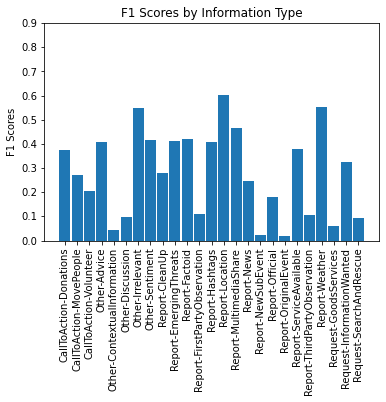

In [22]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Type Categorization
# Per Information Type F1 Graph
# --------------------------------------------------
# Per Category Classification Performance
# F1 scores for each information type, graphed
# Does not average across events (larger events have more impact)



N = len(informationTypes2Index)
ind = np.arange(N)

scoresPerCategoryF1 = []
categoryLabels = []
for categoryId in informationTypes2Index.keys():
    localF1Score = f1_score(category2GroundTruth[categoryId], category2Predicted[categoryId], average='binary')
    print(categoryId, localF1Score)
    scoresPerCategoryF1.append(localF1Score)
    categoryLabels.append(categoryId)
    
width = 0.90       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, scoresPerCategoryF1, width)

plt.ylabel('F1 Scores')
plt.title('F1 Scores by Information Type')
plt.xticks(ind, categoryLabels, rotation='vertical')
plt.yticks(np.arange(0, 1, 0.1))

plt.show()

In [23]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Type Categorization
# Per Event Performance
# --------------------------------------------------
# Categorization performance for each event
# Precision, recall and F1 only consider the positive class
# Accuracy is an overall metric
# We report performance for all categories, high importance categories and low importance categories
# Macro average (categories have equal weight)

perEventFile.write("--------------------------------------------------"+"\n")
perEventFile.write("EVALUATON: Information Type Categorization (Multi-type)"+"\n")
perEventFile.write("Per Event Performance"+"\n")
perEventFile.write("--------------------------------------------------"+"\n")

for eventId in eventIdentifiers:
    tavgPrecision = 0.0
    tavgRecall = 0.0
    tavgF1 = 0.0
    tavgAccuracy = 0.0

    categoryCount = 0
    
    for categoryId in informationTypes2Index.keys():
        if sum(event2groundtruth[eventId].get(categoryId)) == 0:
            continue
        
        categoryPrecision = precision_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        categoryRecall = recall_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        categoryF1 = f1_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        categoryAccuracy = accuracy_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId))
        
        tavgPrecision = tavgPrecision + categoryPrecision
        tavgRecall = tavgRecall + categoryRecall
        tavgF1 = tavgF1 + categoryF1
        tavgAccuracy = tavgAccuracy + categoryAccuracy
        
        categoryCount += 1
    
    if categoryCount == 0:
        print("No categories for event:", eventId)
        continue
    
    print(eventId)
    print("  Information Type Precision (positive class, multi-type, macro): "+str(tavgPrecision/categoryCount))
    print("  Information Type Recall (positive class, multi-type, macro): "+str(tavgRecall/categoryCount))
    print("  Information Type F1 (positive class, multi-type, macro): "+str(tavgF1/categoryCount))
    print("  Information Type Accuracy (overall, multi-type, macro): "+str(tavgAccuracy/categoryCount))
    print("")
    
    perEventFile.write(eventId+"\n")
    perEventFile.write("  Information Type Precision (positive class, multi-type, macro): "+str(tavgPrecision/len(informationTypes2Index))+"\n")
    perEventFile.write("  Information Type Recall (positive class, multi-type, macro): "+str(tavgRecall/len(informationTypes2Index))+"\n")
    perEventFile.write("  Information Type F1 (positive class, multi-type, macro): "+str(tavgF1/len(informationTypes2Index))+"\n")
    perEventFile.write("  Information Type Accuracy (overall, multi-type, macro): "+str(tavgAccuracy/len(informationTypes2Index))+"\n")
    perEventFile.write("\n")
    
perEventFile.write("\n")

2020_02_10_mideast_tornadoes.day2_al.2020
  Information Type Precision (positive class, multi-type, macro): 0.2564034510133149
  Information Type Recall (positive class, multi-type, macro): 0.38638794925818765
  Information Type F1 (positive class, multi-type, macro): 0.27302442084563255
  Information Type Accuracy (overall, multi-type, macro): 0.899494475713988

2020_05_06_tn_derecho.2020
  Information Type Precision (positive class, multi-type, macro): 0.27776573412834543
  Information Type Recall (positive class, multi-type, macro): 0.29711746402032957
  Information Type F1 (positive class, multi-type, macro): 0.2331539448140488
  Information Type Accuracy (overall, multi-type, macro): 0.8891838955386288

2019_10_25_kincade_wildfire.2019
  Information Type Precision (positive class, multi-type, macro): 0.32430205828955627
  Information Type Recall (positive class, multi-type, macro): 0.3252957753666945
  Information Type F1 (positive class, multi-type, macro): 0.3008151579940823
  I

1

/Users/cbuntain/Development/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


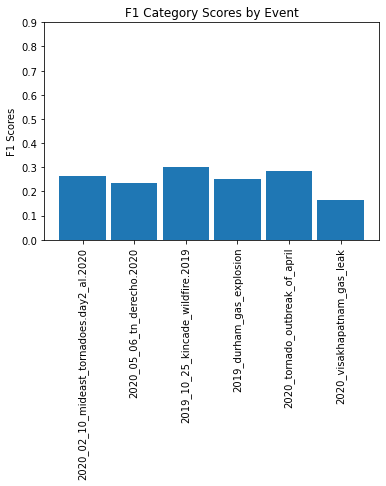

In [24]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Type Categorization
# Per Event F1 Graph
# --------------------------------------------------
# Multi-type (1 vs All): Tweets have multiple information types, aim: predict all of them
# Macro average (categories have equal weight)

N = len(eventIdentifiers)
ind = np.arange(N)

scoresPerEventF1 = []
for eventId in eventIdentifiers:
    avgF1_ = 0.0
    
    for categoryId in informationTypes2Index.keys():
        avgF1_ = avgF1_ + f1_score(event2groundtruth[eventId].get(categoryId), event2prediction[eventId].get(categoryId), average='binary')
        
    scoresPerEventF1.append(avgF1_/len(informationTypes2Index))
    
width = 0.90       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, scoresPerEventF1, width)

plt.ylabel('F1 Scores')
plt.title('F1 Category Scores by Event')
plt.xticks(ind, eventIdentifiers, rotation='vertical')
plt.yticks(np.arange(0, 1, 0.1))

plt.show()

In [25]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Priority Level
# Overall Performance
# --------------------------------------------------
# How divergent is the system from the human priority labels?
# F1 performance over information types, higher is better
# Macro average (categories have equal weight)

from sklearn.metrics import mean_squared_error

priorityAvgf1 = 0.0;
priorityAvgf1High = 0.0;
priorityAvgf1Low = 0.0;
for categoryId in informationTypes2Index.keys():
    groundTruthPriorities = category2GroundTruthPriority[categoryId]
    predictedPriorities = category2PredictedPriority[categoryId]

    f1 = f1_score(groundTruthPriorities, predictedPriorities, average='macro')
    priorityAvgf1 = priorityAvgf1 + f1;
    
    if any(categoryId in s for s in highImportCategories):
        priorityAvgf1High = priorityAvgf1High + f1
    else:
        priorityAvgf1Low = priorityAvgf1Low + f1
    
    
    
print("Priority Label Prediction (F1, macro): "+str(priorityAvgf1/len(informationTypes2Index)))
    
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: Information Priority Level"+"\n")
resultsFile.write("Overall Performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> Priority Label Prediction (F1, macro): "+str(priorityAvgf1/len(informationTypes2Index))+"\n")
resultsFile.write("\n")

Priority Label Prediction (F1, macro): 0.2808938249485477


1

In [26]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Priority Level
# Overall Performance
# --------------------------------------------------
# How divergent is the system from the human priority labels?
# Use Pearson correlation here to capture parallel increases

priorityAvgCorr = 0.0
priorityAvgCorrHigh = 0.0
priorityAvgCorrLow = 0.0
for categoryId in informationTypes2Index.keys():
    if categoryId == "Other-Irrelevant":
        continue
        
    groundTruthPriorities = [priorityScoreMap[x] for x in category2GroundTruthPriority[categoryId]]
    predictedPriorities = category2PredictedPriorityScore[categoryId]

    # Pathological case when no variation exists in the predictions needs to be handled
    this_corr = 0.0
    if np.mean(np.array(predictedPriorities) - np.mean(predictedPriorities)) != 0.0:
        this_corr = np.corrcoef(groundTruthPriorities, predictedPriorities)[0,1]
    priorityAvgCorr = priorityAvgCorr + this_corr
    
    if any(categoryId in s for s in highImportCategories):
        priorityAvgCorrHigh = priorityAvgCorrHigh + this_corr
    else:
        priorityAvgCorrLow = priorityAvgCorrLow + this_corr
    
print("Priority Score Prediction (Pearson): "+str(priorityAvgCorr/(len(informationTypes2Index)-1)))
print("Priority Score Prediction, High (Pearson): "+str(priorityAvgCorrHigh/numHighInformationTypes))
print("Priority Score Prediction, Low (Pearson): "+str(priorityAvgCorrLow/(numLowInformationTypes-1)))


resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("EVALUATON: Information Priority Score"+"\n")
resultsFile.write("Correlational Performance"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("> Priority Correlation (Pearson): "+str(priorityAvgCorr/(len(informationTypes2Index)-1))+"\n")
resultsFile.write("> Priority Correlation, High (Pearson): "+str(priorityAvgCorrHigh/numHighInformationTypes)+"\n")
resultsFile.write("> Priority Correlation, Low (Pearson): "+str(priorityAvgCorrLow/(numLowInformationTypes-1))+"\n")
resultsFile.write("\n")

Priority Score Prediction (Pearson): 0.14096362683911456
Priority Score Prediction, High (Pearson): 0.09366830167503075
Priority Score Prediction, Low (Pearson): 0.15672873522714253


1

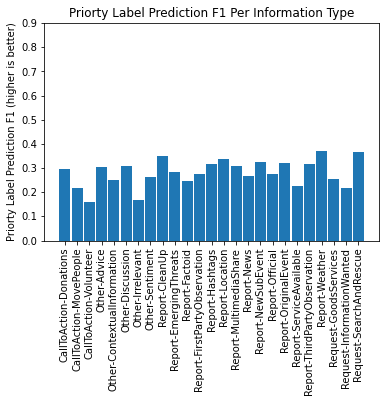

In [27]:
# --------------------------------------------------
# TREC-IS 2021-A
# Information Priority Level
# Per Information Type Performance
# --------------------------------------------------
# F1 per information type (macro averaged), higher is better
# Macro average (categories have equal weight)

N = len(informationTypes2Index)
ind = np.arange(N)

priorityCatF1Values = []
categoryLabels = []
for categoryId in informationTypes2Index.keys():
    groundTruthPriorities = category2GroundTruthPriority[categoryId]
    predictedPriorities = category2PredictedPriority[categoryId]
    priorityCatF1 = f1_score(groundTruthPriorities, predictedPriorities, average='macro')
    if (math.isnan(priorityCatF1)):
        priorityCatF1 = 0.0
    categoryLabels.append(categoryId)
    priorityCatF1Values.append(priorityCatF1);
    
width = 0.90       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, priorityCatF1Values, width)

plt.ylabel('Priorty Label Prediction F1 (higher is better)')
plt.title('Priorty Label Prediction F1 Per Information Type')
plt.xticks(ind, categoryLabels, rotation='vertical')
plt.yticks(np.arange(0, 1, 0.1))

plt.show()

In [28]:
resultLine = None

# Print the evaluation table row in latex
print("Run & NDCG & CF1-H & CF1-A & CAcc & PErr-H & PErr-A & PCorr-H & PCorr-A \\\\")

resultLine = (str.format('{0:.4f}', system_ndcg_micro)+
     " & "+
     str.format('{0:.4f}',avgF1High/numHighInformationTypes)+
     " & "+
     str.format('{0:.4f}',avgF1/numInformationTypes)+
     " & "+
     str.format('{0:.4f}',avgAccuracy/numInformationTypes)+
     " & "+
     str.format('{0:.4f}',priorityAvgf1High/numHighInformationTypes)+
     " & "+
     str.format('{0:.4f}',priorityAvgf1/len(informationTypes2Index))+
     " & "+
     str.format('{0:.4f}',priorityAvgCorrHigh/numHighInformationTypes)+
     " & "+
     str.format('{0:.4f}',priorityAvgCorr/len(informationTypes2Index))+
     " \\\\")

print(runName+" & "+resultLine)

resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write("LATEX"+"\n")
resultsFile.write("--------------------------------------------------"+"\n")
resultsFile.write(runName+" & "+resultLine + "\n")

Run & NDCG & CF1-H & CF1-A & CAcc & PErr-H & PErr-A & PCorr-H & PCorr-A \\
njit_semi_sup & 0.5584 & 0.2072 & 0.2823 & 0.8841 & 0.2785 & 0.2809 & 0.0937 & 0.1353 \\


89

In [29]:
# Done
resultsFile.close() 
perTopicFile.close()
perEventFile.close()

In [30]:
# header = [
#     "Run",
#     "date",
#     "team",
#     "description",
#     "paper",
#     "code",
#     "nDCG@100",
#     "Info-Type F1 [Actionable]",
#     "Info-Type F1 [All]",
#     "Info-Type Accuracy",
#     "Priority F1 [Actionable]",
#     "Priority F1 [All]",
#     "Priority R [Actionable]",
#     "Priority R [All]",
# ]

import csv
if os.path.isfile("metadata.json"):
    this_cwd = os.getcwd()
    sub_date_ = this_cwd.partition("submissions/")[-1].partition("-")[0]
    sub_date = "%s/%s/%s" % (sub_date_[:4], sub_date_[4:6], sub_date_[6:])
    
    leaderboard_entry = None
    with open("metadata.json", "r") as in_file:
        
        metadata = json.load(in_file)
        
        leaderboard_entry = [
            runName,
            sub_date,
            metadata["organization"].lower(),
            metadata["model_description"],
            metadata["paper"] if metadata["paper"].startswith("http") else "",
            metadata["code"] if metadata["code"].startswith("http") else "",
            str.format('{0:.4f}',system_ndcg_micro),
            str.format('{0:.4f}',avgF1High/numHighInformationTypes),
            str.format('{0:.4f}',avgF1/numInformationTypes),
            str.format('{0:.4f}',avgAccuracy/numInformationTypes),
            str.format('{0:.4f}',priorityAvgf1High/numHighInformationTypes),
            str.format('{0:.4f}',priorityAvgf1/len(informationTypes2Index)),
            str.format('{0:.4f}',priorityAvgCorrHigh/numHighInformationTypes),
            str.format('{0:.4f}',priorityAvgCorr/len(informationTypes2Index)),
        ]
        
    with open(runName+".v"+str(version)+"."+edition+".leaderboard.csv","w") as csvResultsFile:
        leader_writer = csv.writer(csvResultsFile)
        leader_writer.writerow(leaderboard_entry)